In [1]:
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from retinaface import RetinaFace
import numpy as np
import cv2
print(sys.version)
print(np.__version__)
print(tf.__version__)

3.10.14 | packaged by Anaconda, Inc. | (main, May  6 2024, 19:44:50) [MSC v.1916 64 bit (AMD64)]
1.26.4
2.10.1


In [10]:
def subdivideimage(img: np.ndarray, rows: int, cols: int) -> list:
    """
    Divide una imagen en una cantidad específica de filas y columnas.
    
    Parameters:
    img (np.ndarray): La imagen a subdividir.
    rows (int): Numero de subdivisiones a lo largo del eje vertical (filas).
    cols (int): Numero de subdivisiones a lo largo del eje horizontal (columnas).

    Returns:
    list: Lista de subimágenes como np.ndarray.
    """
    # Obtener las dimensiones de cada subimagen
    height, width = img.shape[0] // rows, img.shape[1] // cols
    
    subimages:list = []
    
    # Iterar sobre cada subimagen
    for i in range(rows):
        for j in range(cols):
            #Definir los límites de la subimagen
            start_y = i * height
            end_y = start_y + height
            start_x = j * width
            end_x = start_x + width
            
            #Extraer la subimagen
            subimg = img[start_y:end_y, start_x:end_x]
            subimages.append(subimg)
    
    return subimages

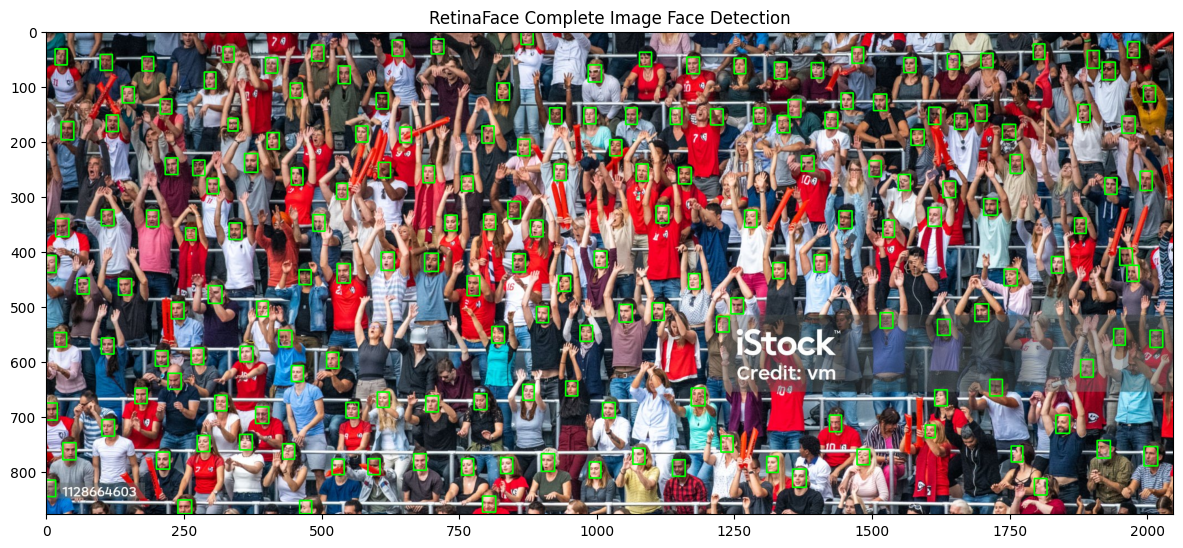

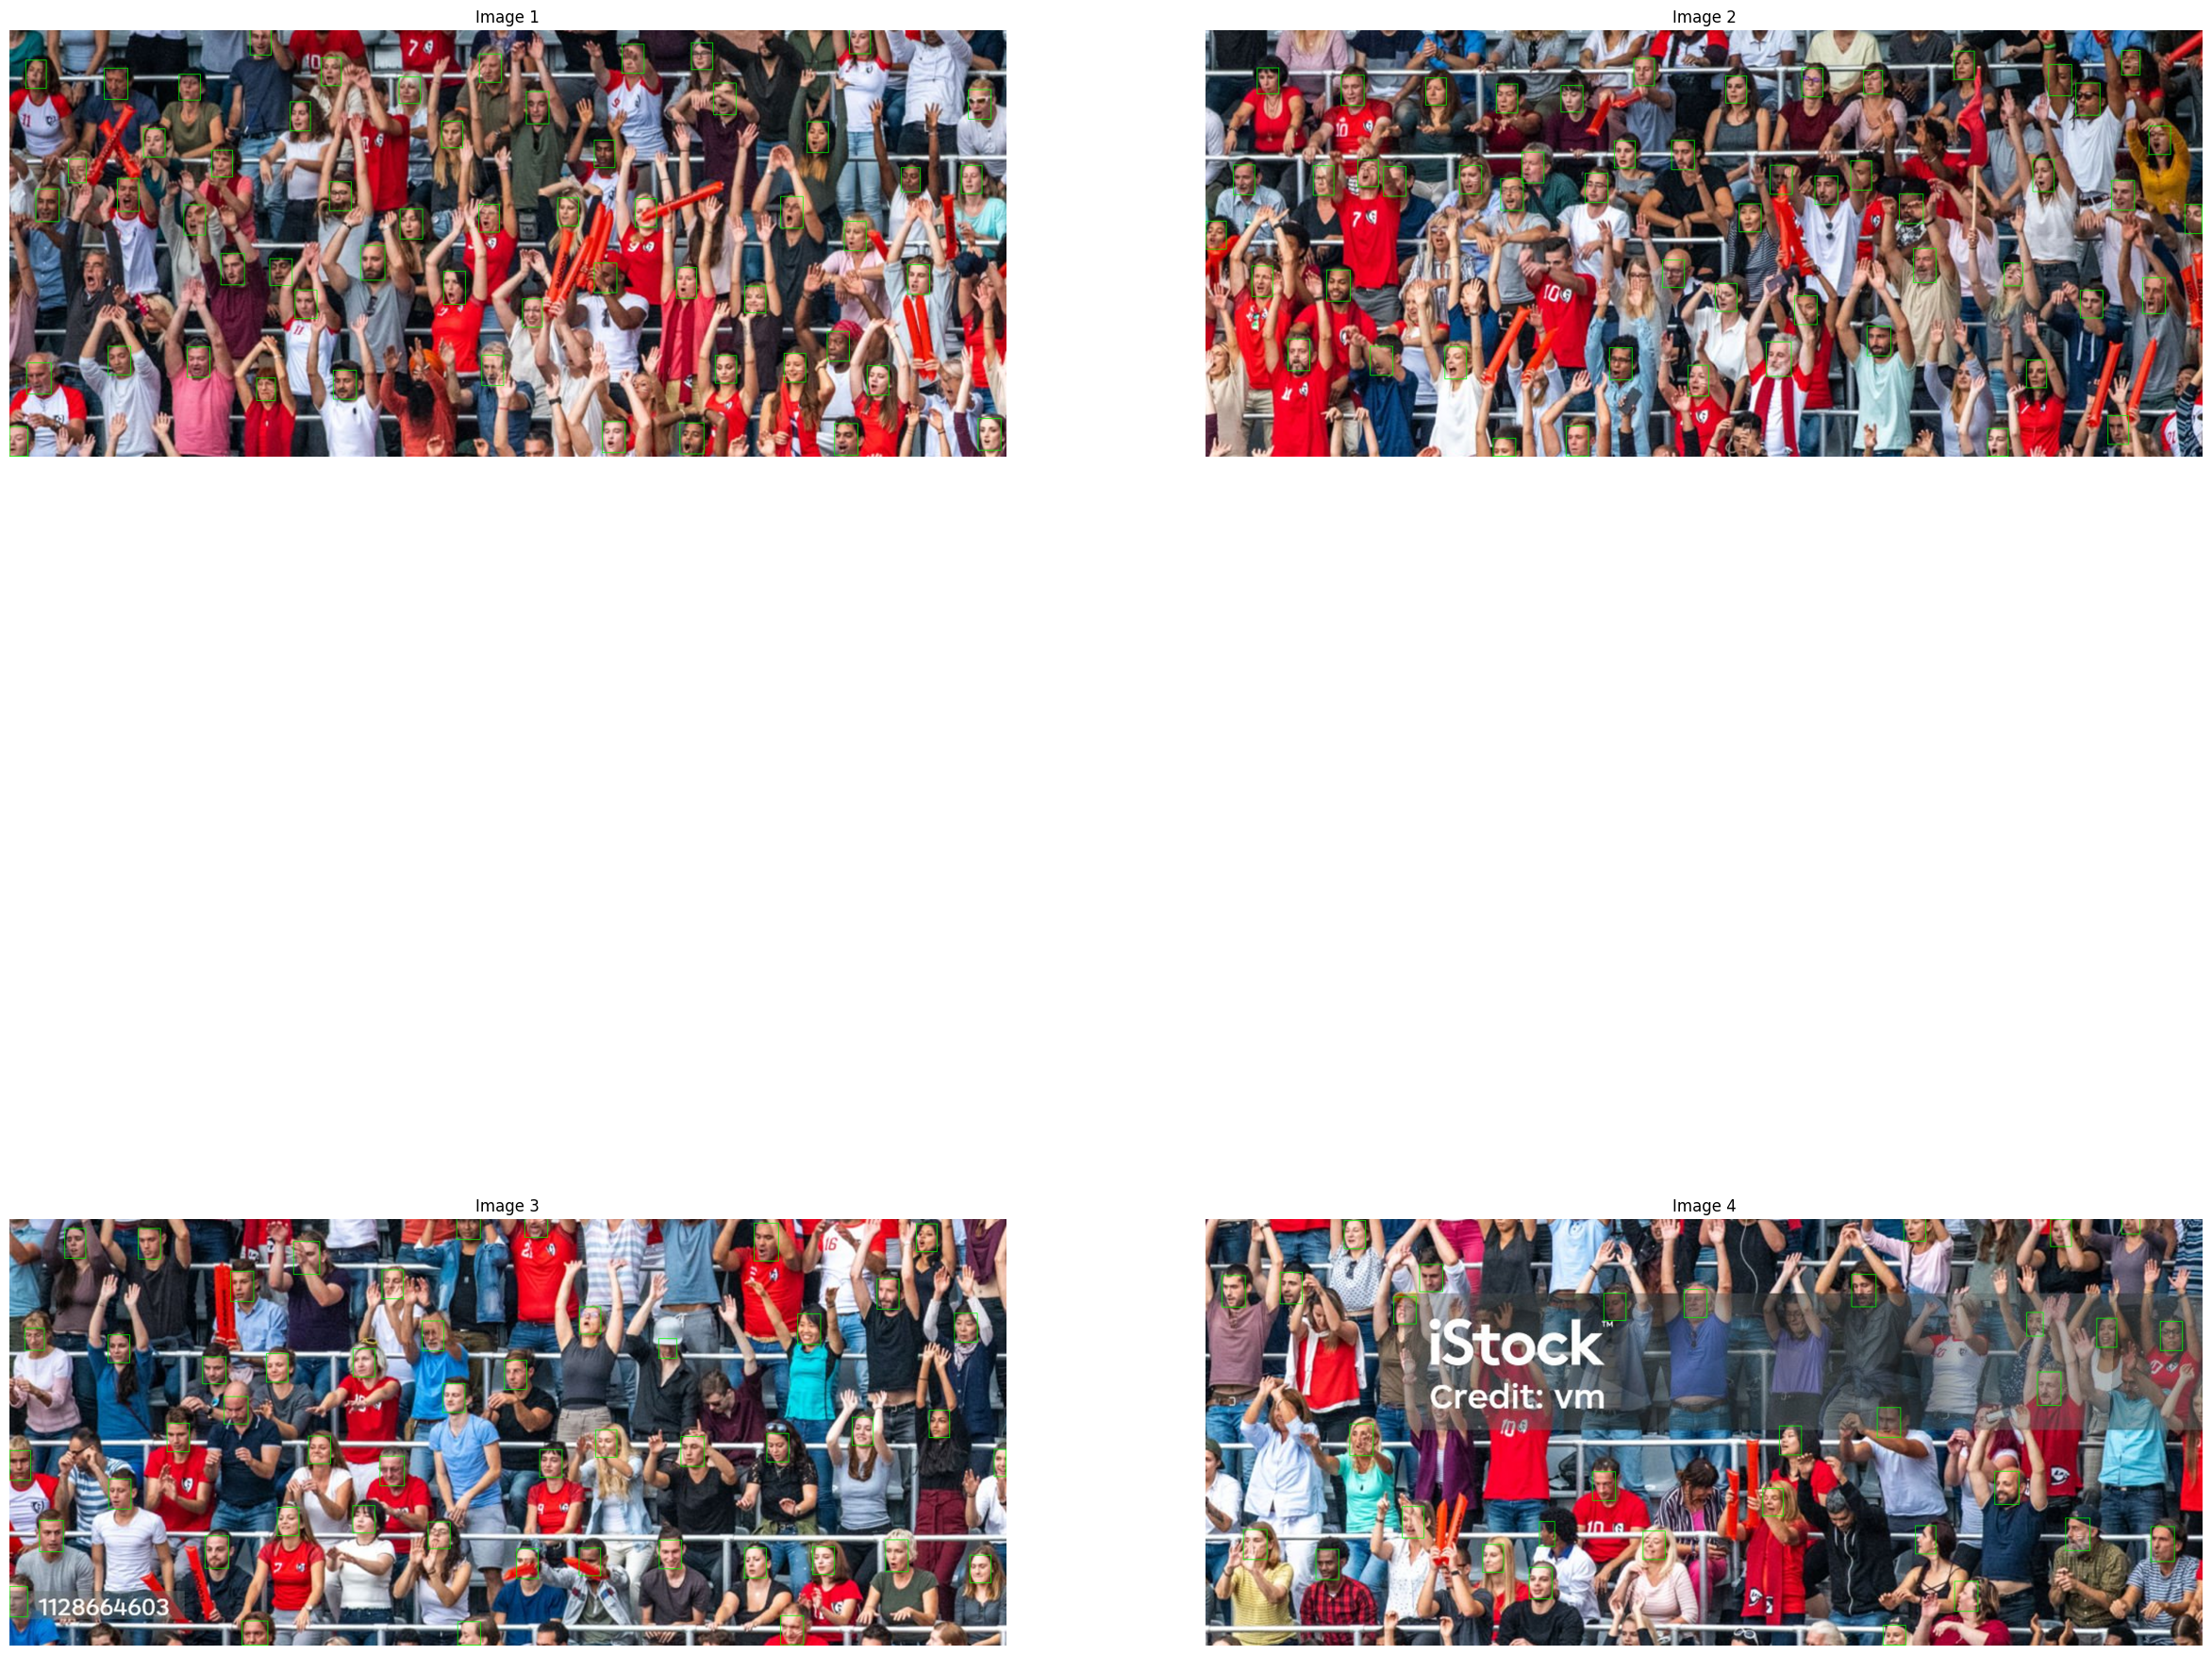

In [28]:
#'../sampledata/classroom/20160622_101427.jpg'

imgpath:str = '../sampledata/crowds/group-people-10.jpg' 
image = cv2.imread(imgpath)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convertir BGR a RGB para matplotlib

#detectar los rostros usando RetinaFace
faces = RetinaFace.detect_faces(img_rgb)

#print(len(faces.keys()))
for key in faces.keys():
    face = faces[key]
    facialarea = face["facial_area"]
    cv2.rectangle(image, (facialarea[2],facialarea[3]), (facialarea[0],facialarea[1]), (0, 255, 0), 2)

# Convertir la imagen con las cajas delimitadoras a RGB para mostrarla con matplotlib
img_rgb_with_boxes = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con los rostros detectados
plt.figure(figsize=(32,32))
plt.subplot(1, 2, 2)
plt.imshow(img_rgb_with_boxes)
plt.title('RetinaFace Complete Image Face Detection')
plt.axis('on')
plt.show()

#Subdividir la imagen en fila x columna
rows:int = 2
cols:int = 2
subimages = subdivideimage(img_rgb, rows,cols)

#Mostrar las subimagenes
"""plt.figure(figsize=(30, 30))
for i, subimg in enumerate(subimages):
    plt.subplot(rows,cols, i + 1)
    plt.imshow(subimg)
    plt.title(f'Image {i+1}')
    plt.axis('off')
plt.show() """

"""
cv2.INTER_NEAREST: Interpolación de vecino más cercano (más rápido, menos suave).
cv2.INTER_LINEAR: Interpolación lineal (buena para aumentos).
cv2.INTER_CUBIC: Interpolación bicúbica (mejor calidad, pero más lenta).
cv2.INTER_LANCZOS4: Interpolación de Lanczos (muy buena calidad, especialmente para grandes aumentos, pero también más lenta).
"""

# Procesar cada subimagen para detectar rostros y dibujar los recuadros
processed_subimages = []
for subimg in subimages:

     #Aumentar la escala
    #scale_factor = 1.5
    #resized_subimg = cv2.resize(subimg, (0, 0), fx=scale_factor, fy=scale_factor)

    # Factor de escala (por ejemplo, 4x para aumentar de 128x128 a 512x512)
    scale_factor = 4.0
    
    # Obtener las dimensiones originales de la imagen
    original_height, original_width = subimg.shape[:2]
    
    # Calcular las nuevas dimensiones manteniendo la proporción
    new_width = int(original_width * scale_factor)
    new_height = int(original_height * scale_factor)
    new_size = (new_width, new_height)
    
    # Redimensionar la imagen
    resized_subimg = cv2.resize(subimg, new_size, interpolation=cv2.INTER_CUBIC)
    
    #Detectar los rostros en la subimagen
    faces = RetinaFace.detect_faces(resized_subimg)

    # Dibujar los recuadros en las caras detectadas
    for key in faces.keys():
        face = faces[key]
        facial_area = face["facial_area"]
        cv2.rectangle(resized_subimg, (facial_area[0], facial_area[1]), (facial_area[2], facial_area[3]), (0, 255, 0), 2)
    
    # Guardar la subimagen procesada
    processed_subimages.append(resized_subimg)

# Mostrar las subimágenes procesadas con Matplotlib
plt.figure(figsize=(30, 30))
for i, subimg in enumerate(processed_subimages):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(subimg)
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.show()
